In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initalize_parameters(lenw):
    w = np.random.randn(1, lenw)
    b = 0 
    return w,b

In [3]:
def forward_prop(x, w, b):
    z = np.dot(w,x) + b
    return z

In [4]:
def cost_function(z, y):
    m = y.shape[1]
    j = (1/(2*m))*np.sum(np.square(z-y))
    return j

In [5]:
def back_prop(x, y, z):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(z,x.T)
    db = np.sum(dz)
    return dw,db

In [6]:
def gradient_descent_update(w, b, dw, db, learning_rate):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [10]:
def linear_regression_model(x_train, y_train, x_val, y_val, learning_rate, epochs):
    w,b = initalize_parameters(lenw=x_train.shape[0])
    costs_train = []
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    for i in range(epochs):
        z_train = forward_prop(x_train,w,b)
        cost_train = cost_function(z_train, y_train)
        dw, db = back_prop(x_train, y_train, z_train)
        w, b = gradient_descent_update(w, b, dw, db, learning_rate)
        if i%10 ==0: 
            costs_train.append(cost_train)
        MAE_train = (1/m_train)*np.sum(np.abs(z_train-y_train))
        MSE_train = np.square(np.subtract(z_train[0],y_train[0])).mean()
        
        
        z_val = forward_prop(x_val,w,b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val - y_val))
        MSE_val = np.square(np.subtract(z_val[0],y_val[0])).mean()
        
    print(f"epoches {str(i+1)} / {epochs}:")
    print(f"training cost {str(cost_train)} | validation cost {str(cost_val)}")
    print(f"training MAE {str(MAE_train)} | validation MAE {str(MAE_val)}")
    print(f"training MSE {str(MSE_train)} | validation MSE {str(MSE_val)}")

    plt.plot(costs_train)
    plt.xlabel('iteration')
    plt.ylabel('training cost')
    plt.title('learning rate'+str(learning_rate))
    plt.show()
    return z_val[0]

## load data and preprocess

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('data.txt',names=['s', 'rooms', 'price'])
df

,s,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [13]:
y = df['price'].copy()
df = df.drop(columns=['price'])

In [14]:
x = (df - df.mean())/(df.max() - df.min())
x.head()

,s,rooms
0,0.028494,-0.042553
1,-0.110502,-0.042553
2,0.110127,-0.042553
3,-0.161247,-0.292553
4,0.275598,0.207447


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(35, 2) (35,)
(12, 2) (12,)


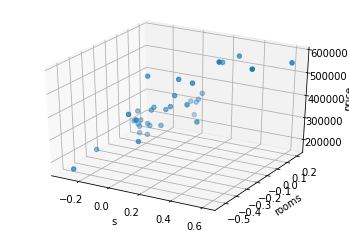

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train['s'], x_train['rooms'], y_train)
ax.set_xlabel('s')
ax.set_ylabel('rooms')
ax.set_zlabel('price')
plt.show()

In [17]:
x_train = x_train.T
x_test = x_test.T

In [18]:
y_train = np.array([y_train])
y_test = np.array([y_test])

In [19]:
print(y_test.shape, y_train.shape)

(1, 12) (1, 35)


## train the model

epoches 60000 / 60000:
training cost 5390396374.066042 | validation cost 6500894959.11221
training MAE 86611.44439513143 | validation MAE 97976.67813851337
training MSE 10780792748.132084 | validation MSE 13001789918.22442


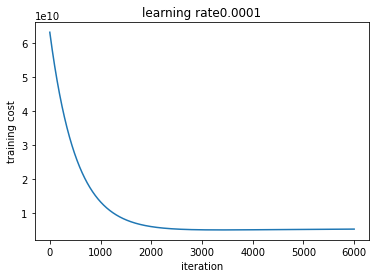

In [22]:
y_pred_test = linear_regression_model(x_train, y_train, x_test, y_test, 0.0001, 60000)

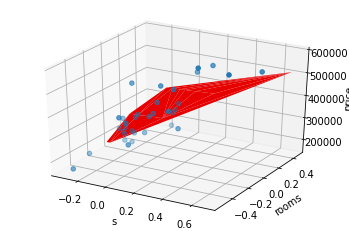

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter((x_train.T)['s'], (x_train.T)['rooms'], y_train)
ax.set_xlabel('s')
ax.set_ylabel('rooms')
ax.set_zlabel('price')
ax.plot_trisurf((x_test.T)['s'], (x_test.T)['rooms'], y_pred_test, color='red')
plt.show()